In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io 
import regex
import re

In [3]:
df.head()

,Grupo de clientes NAME,División NAME,Articulo name,Suma de Ventas,Suma de Ctd Vendida,Suma de Lucro,Suma de Ctd Facturas
0,Bares-Discotecas,Dry Food,Papas Rizadas Natural 110g,38822.0002,11.0,14171.0002,3
1,Bares-Discotecas,Dry Food,2pack Old Spice Spray Mar Profundo 93g,38486.0000,2.0,4241.2193,2
2,Bares-Discotecas,Dry Food,Ablandacarnes El Rey Bolsa 500g,8193.0000,1.0,2383.8852,1
3,Bares-Discotecas,Dry Food,Aceite Bonlife De Soya 1000ml,22352.0000,2.0,3240.0000,2
4,Bares-Discotecas,Dry Food,Aceite Bonlife De Soya 3000ml\t,95190.0000,4.0,-5436.0000,3


In [4]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df.iloc[:,0:1])
df.iloc[:,0:1] = enc.transform(df.iloc[:,0:1])

In [5]:
df

,Grupo de clientes NAME,División NAME,Articulo name,Suma de Ventas,Suma de Ctd Vendida,Suma de Lucro,Suma de Ctd Facturas
0,0.0,Dry Food,Papas Rizadas Natural 110g,38822.0002,11.0,14171.0002,3
1,0.0,Dry Food,2pack Old Spice Spray Mar Profundo 93g,38486.0000,2.0,4241.2193,2
2,0.0,Dry Food,Ablandacarnes El Rey Bolsa 500g,8193.0000,1.0,2383.8852,1
3,0.0,Dry Food,Aceite Bonlife De Soya 1000ml,22352.0000,2.0,3240.0000,2
4,0.0,Dry Food,Aceite Bonlife De Soya 3000ml\t,95190.0000,4.0,-5436.0000,3
...,...,...,...,...,...,...,...
143612,19.0,Service,Canal De Venta Click/Call And Delivery,150000.0000,18.0,149999.8200,20
143613,19.0,Service,Canal Rappi,0.0000,1.0,-50.0000,1
143614,19.0,Service,Delivery,850.0000,19.0,-100.0000,31
143615,19.0,Service,Distribucion,236540.0000,216541.0,19999.0000,17


In [6]:
Base=df[{"Suma de Ventas","Suma de Ctd Vendida","Suma de Lucro","Suma de Ctd Facturas"}]

In [7]:
Base

,Suma de Ventas,Suma de Lucro,Suma de Ctd Facturas,Suma de Ctd Vendida
0,38822.0002,14171.0002,3,11.0
1,38486.0000,4241.2193,2,2.0
2,8193.0000,2383.8852,1,1.0
3,22352.0000,3240.0000,2,2.0
4,95190.0000,-5436.0000,3,4.0
...,...,...,...,...
143612,150000.0000,149999.8200,20,18.0
143613,0.0000,-50.0000,1,1.0
143614,850.0000,-100.0000,31,19.0
143615,236540.0000,19999.0000,17,216541.0


In [8]:
from sklearn.decomposition import PCA
pca = PCA(2)
scaled_df_pca=pca.fit_transform(Base)

In [9]:
scaled_df_pca

array([[-1026722.5029496 ,    43163.68312725],
       [-1027576.86444711,    53062.3255532 ],
       [-1057925.53068895,    53334.34939746],
       ...,
       [-1065388.27971953,    55431.20008314],
       [ -828955.58317866,    47953.15197096],
       [-1066134.34729987,    56293.40122277]])

In [10]:
y=np.array(df.iloc[:,0:1])

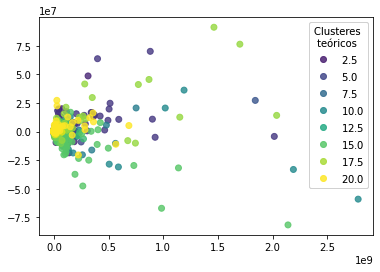

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
g = plt.scatter(scaled_df_pca[:,0], scaled_df_pca[:,1], c = y + 1, alpha = 0.8)
legend = ax.legend(*g.legend_elements(), loc = "upper right", title = "Clusteres \n teóricos")
ax.add_artist(legend)
plt.show()

In [12]:
from sklearn.cluster import KMeans

kmeans_5 = KMeans(n_clusters = 20, random_state = 1234).fit_predict(scaled_df_pca)

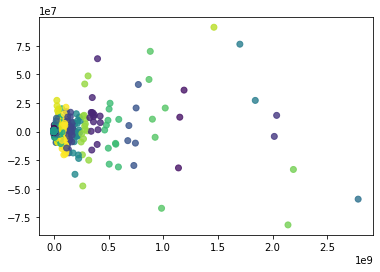

In [13]:
fig, ax = plt.subplots()
g_puntos = plt.scatter(scaled_df_pca[:,0], scaled_df_pca[:,1], c = kmeans_5, alpha = 0.8, label = "Centroides")
plt.show()

In [38]:
df2 = pd.read_excel(r'C:\Users\EMORENO\Downloads\Base_final.xlsx')

In [15]:
df2

,Grupo de clientes NAME,División NAME,Articulo name,Suma de Ventas,Suma de Ctd Vendida,Suma de Lucro,Suma de Ctd Facturas
0,Bares-Discotecas,Dry Food,Papas Rizadas Natural 110g,38822.0002,11.0,14171.0002,3
1,Bares-Discotecas,Dry Food,2pack Old Spice Spray Mar Profundo 93g,38486.0000,2.0,4241.2193,2
2,Bares-Discotecas,Dry Food,Ablandacarnes El Rey Bolsa 500g,8193.0000,1.0,2383.8852,1
3,Bares-Discotecas,Dry Food,Aceite Bonlife De Soya 1000ml,22352.0000,2.0,3240.0000,2
4,Bares-Discotecas,Dry Food,Aceite Bonlife De Soya 3000ml\t,95190.0000,4.0,-5436.0000,3
...,...,...,...,...,...,...,...
143612,Tiendas Especia. Alimentos,Service,Canal De Venta Click/Call And Delivery,150000.0000,18.0,149999.8200,20
143613,Tiendas Especia. Alimentos,Service,Canal Rappi,0.0000,1.0,-50.0000,1
143614,Tiendas Especia. Alimentos,Service,Delivery,850.0000,19.0,-100.0000,31
143615,Tiendas Especia. Alimentos,Service,Distribucion,236540.0000,216541.0,19999.0000,17


In [41]:
import unidecode
def sinopsis_cleaning(txt):

    out = unidecode.unidecode(txt)
    out = out.split(" ")
    out = ['URL' if bool(regex.search("http[s]?://", i)) else i for i in out]
    out = [i for i in out if i not in ["URL",""]]
    out = [regex.sub("[^\\w\\s]|\n", "", i) for i in out]
    out = [ i.lower() for i in out]
    out = [regex.sub("impoconsumo", "", i) for i in out]
    out = [regex.sub("item", "", i) for i in out]
    out = [regex.sub("Delivery", "", i) for i in out]
    return out

In [42]:
clean = list(map(sinopsis_cleaning, df2["Articulo name"]))
clean_sentences = [" ".join(i) for i in clean]
print(clean_sentences[100])

aderezo de mostaza san jorge sachet 8gx102u


In [43]:
# Cargamos las librerías a utilizar
from wordcloud import WordCloud
import matplotlib.pyplot as plt

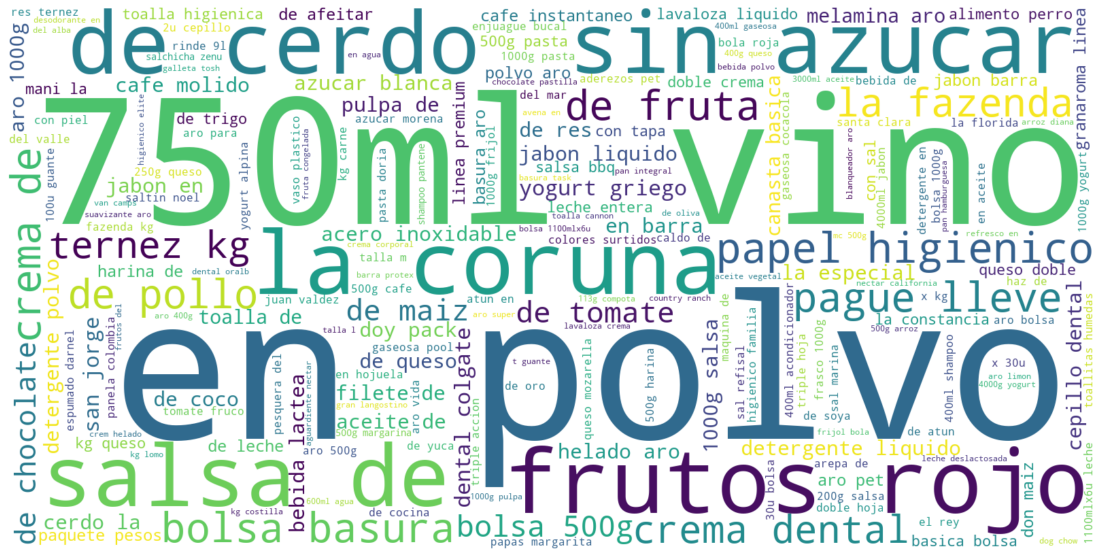

In [44]:

text = " ".join(df2["Articulo name"])
text = sinopsis_cleaning(text)
text=' '.join(text)

# Armamos la nube de palabras
wordcloud = WordCloud(width = 1600, height = 800, 
    background_color = "white").generate(text)
plt.figure(figsize = (20, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()


In [20]:
import nltk
nltk.download('stopwords')
import spacy
nlp = spacy.load("es_core_news_sm")
# Creamos una lista de stopwords
from nltk.corpus import stopwords
lista_stopwords = stopwords.words("spanish")
len(lista_stopwords)
# Cargamos extra stop words
lista_stopwords=lista_stopwords
lista_stopwords=np.unique(lista_stopwords)
len(lista_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EMORENO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


313

In [21]:
def sinopsis_cleaning(txt):

    out = unidecode.unidecode(txt)
    out = out.split(" ")
    out = ['URL' if bool(regex.search("http[s]?://", i)) else i for i in out]
    out = [i for i in out if i not in ["URL",""]]
    out = [regex.sub("[^\\w\\s]|\n", "", i) for i in out]
    out = [ i.lower() for i in out]
    out = [i for i in out if i not in lista_stopwords]
    out = [regex.sub("impoconsumo", "", i) for i in out]
    out = [regex.sub("item", "", i) for i in out]
    out = [regex.sub("Delivery", "", i) for i in out]
    out = ' '.join(out)
    out = nlp(out)
    out = [x.lemma_ for x in out]
    out = [regex.sub("él", "", i) for i in out]
    out = [i for i in out if len(i) >= 5]
    
    return out

In [22]:
clean = list(map(sinopsis_cleaning, df2["Articulo name"]))
clean_sentences = [" ".join(i) for i in clean]
print(clean_sentences[100])

aderezo mostaza jorge sachet 8gx102u


In [ ]:

text = " ".join(df2["Articulo name"])
text = sinopsis_cleaning(text)
text=' '.join(text)
nlp.max_length = len(text) + 100
# Armamos la nube de palabras
wordcloud = WordCloud(width = 1600, height = 800, 
    background_color = "white").generate(text)
plt.figure(figsize = (20, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words=set(lista_stopwords))
count_matrix = count.fit_transform(df2["Articulo name"])
count_matrix

<143617x11212 sparse matrix of type '<class 'numpy.int64'>'
	with 709121 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

#Calculamos la matriz de similitud de coseno
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

#Definimos el objeto TF-IDF Vectorizer Object
tfidf = TfidfVectorizer()

#Construimos la matriz TF-IDF
tfidf_matrix = tfidf.fit_transform(clean_sentences)


In [ ]:
def recomendador(title, cosine_sim=cosine_sim, df=Datos):
    
    #Paso 2
    df = df.reset_index()
    indices = pd.Series(df.index, index=df['titulo']).drop_duplicates()
    #Paso 3
    idx = indices[title]

    #Paso 4
    sim_scores = list(enumerate(cosine_sim[idx]))

    #Paso 5
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    #Paso 6
    sim_scores = sim_scores[1:11]

    cliente_indices = [i[0] for i in sim_scores]

    #Paso 7
    return df2["Articulo name"].iloc[cliente_indices]

In [ ]:
recomendador('Bares-Discotecas',cosine_sim=cosine_sim2, df=Datos)